In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [3]:

# Sources: https://www.kaggle.com/code/delai50/visualize-numerical-features-with-chernoff-faces

def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', linewidth=2)
    # e.set_clip_box(ax.bbox)
    # e.set_facecolor([0,0,0])
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    
    # draw nose
    ax.plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = matplotlib.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = matplotlib.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)
    
    p = matplotlib.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    ax.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    ax.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')

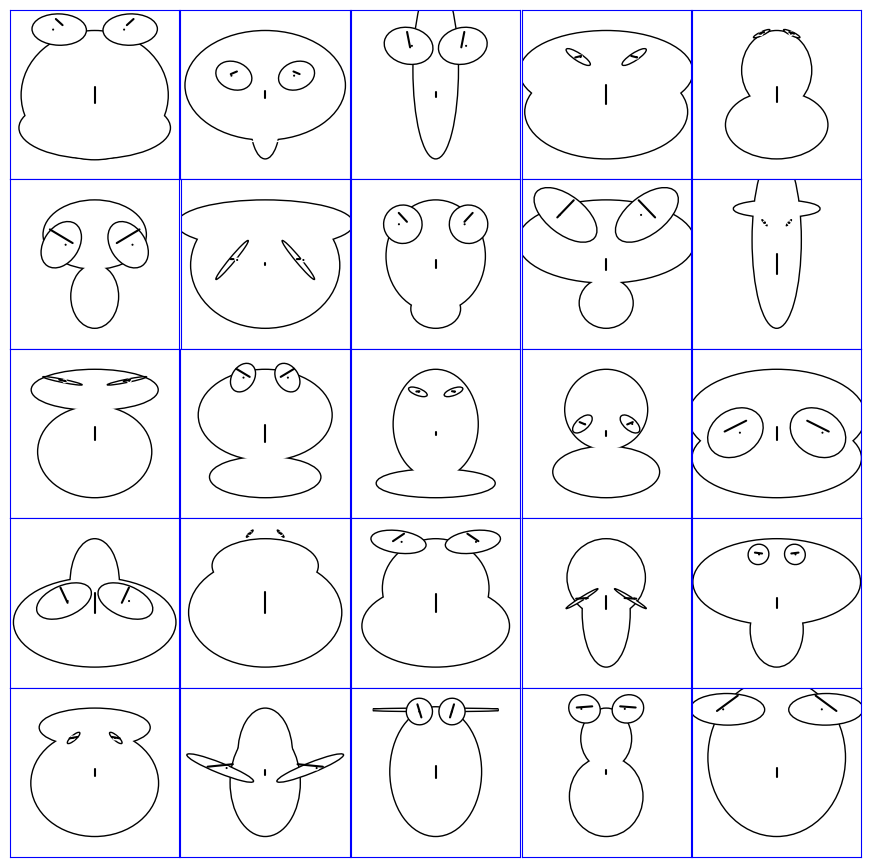

In [4]:
from numpy.random import rand
from numpy import pi, arctan

fig = plt.figure(figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0, wspace=0)

In [5]:
iris = pd.read_csv('data/iris.data', names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'class'], header=None)
iris

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
from ChernoffFace import *

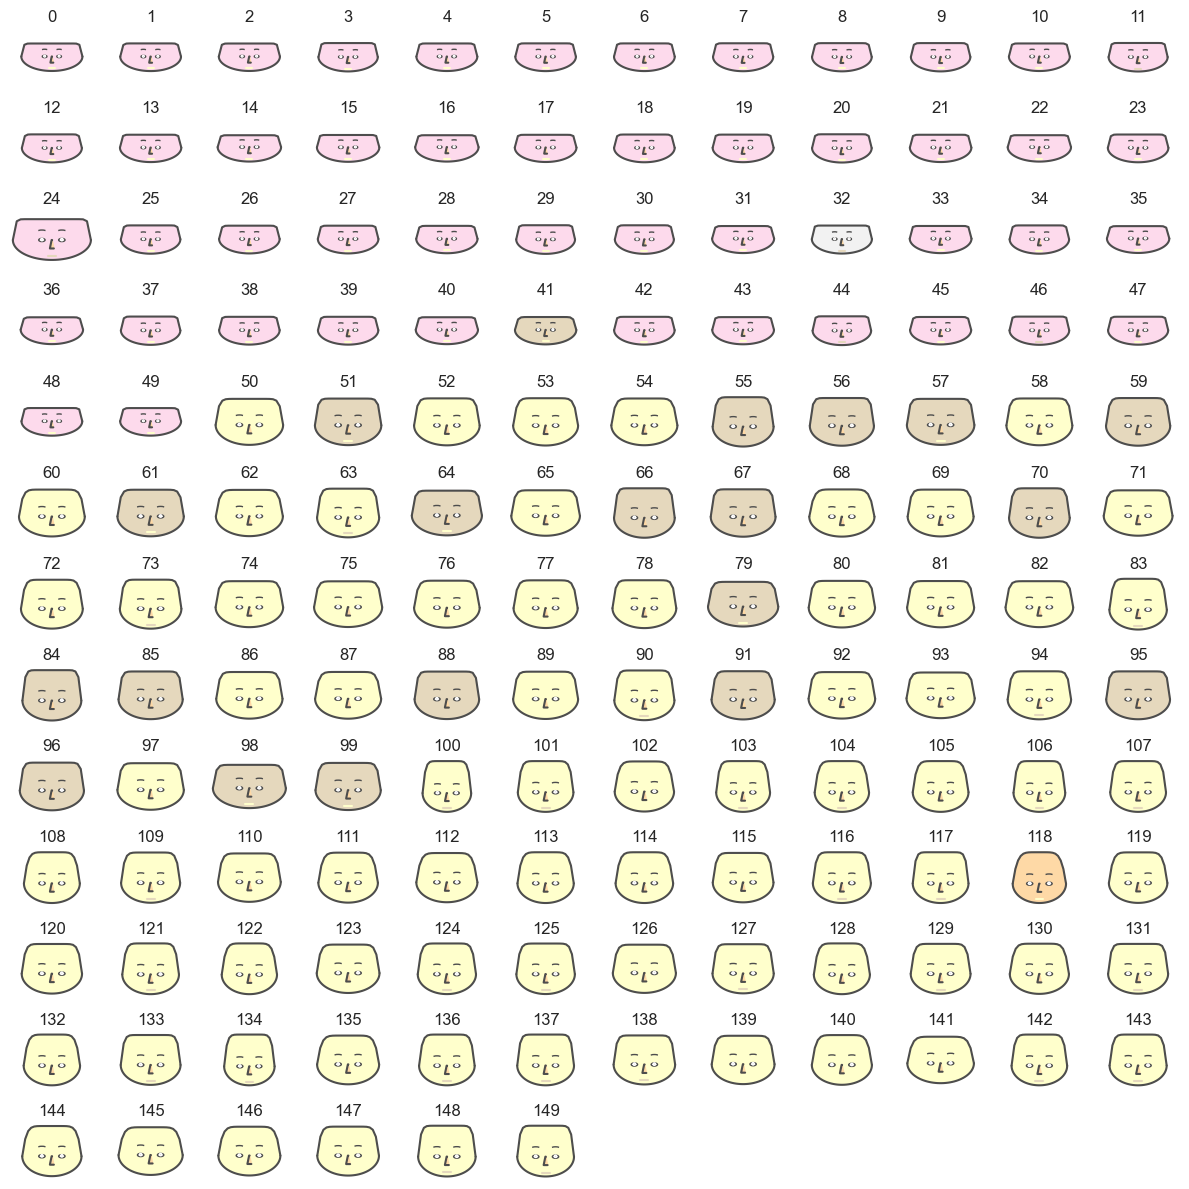

In [8]:
# Make Chernoff faces
fig = chernoff_face(data=iris, 
                    long_face=False,
                    titles=[str(x) for x in list(range(len(iris)))], 
                    figsize=(12, 12),
                    color_mapper=matplotlib.cm.Pastel1)
fig.tight_layout()

![](https://camo.githubusercontent.com/ced6cd0923a923aade542c33f9ccc86614049e30ab7c0c1085ee7823752ce858/687474703a2f2f692e696d6775722e636f6d2f7550425a4a75666c2e676966)